In [102]:
import pandas as pd
import regex

In [103]:
buh_df = pd.read_json('model/buhonline.txt')
buh_df['class'] = '__label__buh'

In [104]:
buh_df = buh_df.drop('small_info', axis=1)
buh_df

,name,link,datetime,full_info,class
0,Установлены штрафы за нарушения по прослеживае...,https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03 15:47:00,Проект соответствующих поправок в КоАП РФ подг...,__label__buh
1,Взыскание долгов с мобилизованных приостановят,https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03 13:31:00,Исполнительные производства в отношении попада...,__label__buh
2,"Минфин уточнил, как определить расходы на поку...",https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03 10:12:00,Порядок определения расходов на приобретение в...,__label__buh
3,В счетах‑фактурах придется указывать больше св...,https://www.buhonline.ru/pub/news/2022/9/18879...,2022-09-30 15:57:00,"В счетах-фактурах, в том числе корректировочны...",__label__buh
4,Пенсионный фонд скорректирует СЗВ‑СТАЖ и други...,https://www.buhonline.ru/pub/news/2022/9/18878...,2022-09-30 15:55:00,Пенсионный фонд подготовил проект постановлени...,__label__buh
...,...,...,...,...,...
1916,Минфин: реализация жилых помещений для временн...,https://www.buhonline.ru/pub/news/2020/12/16209,2020-12-16 09:14:00,Организация продает апартаменты — жилые помеще...,__label__buh
1917,"Налоговики сообщили, когда надо подать уведомл...",https://www.buhonline.ru/pub/news/2020/12/16208,2020-12-16 09:08:00,"Налоговые агенты, которые намерены с 2021 года...",__label__buh
1918,"Минфин разъяснил, как заявить вычет НДС по обо...",https://www.buhonline.ru/pub/news/2020/12/16206,2020-12-15 09:01:00,"Организация приобрела оборудование, которое тр...",__label__buh
1919,"Как действовать налогоплательщикам, которые со...",https://www.buhonline.ru/pub/news/2020/12/16205,2020-12-15 08:58:00,В 2020 году налогоплательщик совмещал ЕНВД и У...,__label__buh


## Выделение новостей из lenta.ru

In [107]:
train_df = pd.read_csv('model/lenta_train.zip')

/tmp/ipykernel_11325/414416163.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('model/lenta_train.zip')


In [109]:
train_df['tags'].unique()

array(['Первая мировая', 'Все', nan, 'Прибалтика', 'Кино', 'Преступность',
       'Общество', 'Происшествия', 'Искусство', 'Бизнес', 'Техника',
       'ТВ и радио', 'Политика', 'Пресса', 'Музыка', 'Люди', 'Звери',
       'Игры', 'Госэкономика', 'Гаджеты', 'Наука', 'Еда', 'Рынки',
       'Деньги', 'Летние виды', 'Интернет', 'Театр', 'Конфликты',
       'Реклама', 'Космос', 'Бокс и ММА', 'Футбол', 'Книги',
       'Зимние виды', 'Достижения', 'Coцсети', 'Вещи', 'События',
       'Средняя Азия', 'Украина', 'Закавказье', 'Белоруссия', 'Молдавия',
       'Софт', 'Квартира', 'Город', 'Дача', 'Офис', 'Оружие', 'Мнения',
       'Москва', 'Регионы', 'Полиция и спецслужбы', 'Криминал',
       'Следствие и суд', 'Движение', 'Производители', 'Мировой бизнес',
       'Финансы компаний', 'Деловой климат', 'Мир', 'Россия', 'Часы',
       'Явления', 'Стиль', 'Инструменты', 'Вооружение', 'Вкусы',
       'Страноведение', 'Госрегулирование', 'История', 'Внешний вид',
       'Автобизнес', 'Аналитика рынка'

In [118]:
train_tags = ['Полиция и спецслужбы', 'Мемы', 'Экология', 'Бокс и ММА', 'Космос', 'История', 'Футбол', 'ТВ и радио', 'Игры', 'Культура']
buisness_tags = ['Бизнес', 'Мировой бизнес', 'Автобизнес', 'Аналитика рынка']

In [119]:
label_other = train_df[train_df['tags'].isin(train_tags)]

In [120]:
label_other = label_other.head(1900)

In [121]:
label_other['tags'] = '__label__other'

In [122]:
label_buisness = train_df[train_df['tags'].isin(buisness_tags)]

In [123]:
label_buisness = label_buisness.head(1900)
label_buisness['tags'] = '__label__buisness'

In [124]:
label_other.head()

,url,title,text,topic,tags,date
446325,https://lenta.ru/news/2012/12/07/editcut/,Убийца чернокожего подростка подал в суд на ка...,"Житель Флориды Джордж Циммерман, обвиняемый в ...",Интернет и СМИ,__label__other,2012/12/07
450358,https://lenta.ru/news/2013/01/14/nocod/,Глава Gearbox рассказал об отказе работать над...,"Глава студии Gearbox Рэнди Питчфорд заявил, чт...",Наука и техника,__label__other,2013/01/14
450380,https://lenta.ru/news/2013/01/14/lost/,Телеканал НТВ потерял детей Удальцова,"Журналист телеканала НТВ в репортаже про ""Марш...",Интернет и СМИ,__label__other,2013/01/14
450449,https://lenta.ru/news/2013/01/14/residentevil/,Готовящийся релиз Resident Evil: Revelations н...,Подтвердились слухи о готовящемся релизе Resid...,Наука и техника,__label__other,2013/01/14
450496,https://lenta.ru/news/2013/01/14/roscosmos/,Роскосмос опубликовал планы до 2020 года,Роскосмос опубликовал основные положения прогр...,Наука и техника,__label__other,2013/01/14


In [125]:
label_buisness.head()

,url,title,text,topic,tags,date
421323,https://lenta.ru/news/2012/05/23/travelwithcar/,РЖД разрешит пассажирам путешествовать с автом...,"""Федеральная пассажирская компания"", входящая ...",Экономика,__label__buisness,2012/05/23
444694,https://lenta.ru/news/2012/11/27/poezd/,РЖД впервые перевезла пассажиров с личными авт...,Вечером 26 ноября 2012 года из Москвы в Хельси...,Экономика,__label__buisness,2012/11/27
450356,https://lenta.ru/news/2013/01/14/deal/,Крупнейший производитель часов в мире купил ог...,"Швейцарская Swatch Group, крупнейший в мире пр...",Экономика,__label__buisness,2013/01/14
450377,https://lenta.ru/news/2013/01/14/rosatom/,"""Дочка"" ""Росатома"" станет единоличным владельц...","Урановый холдинг ""Атомредметзолото"" (АРМЗ), до...",Экономика,__label__buisness,2013/01/14
450399,https://lenta.ru/news/2013/01/14/dusharm/,Временный руководитель крупнейшего ритейлера Р...,Наблюдательный совет крупнейшего ритейлера Рос...,Экономика,__label__buisness,2013/01/14


In [126]:
train_df = pd.concat([label_other, label_buisness])

In [127]:
train_df['tags'].value_counts()

__label__other       1900
__label__buisness    1900
Name: tags, dtype: int64

In [128]:
train_df = train_df.rename(columns={'url':'link', 'title':'name', 'text':'full_info', 'tags':'class', 'date':'datetime'})
train_df = train_df[['name', 'link', 'datetime',  'full_info', 'class']]
display(train_df.head())

,name,link,datetime,full_info,class
446325,Убийца чернокожего подростка подал в суд на ка...,https://lenta.ru/news/2012/12/07/editcut/,2012/12/07,"Житель Флориды Джордж Циммерман, обвиняемый в ...",__label__other
450358,Глава Gearbox рассказал об отказе работать над...,https://lenta.ru/news/2013/01/14/nocod/,2013/01/14,"Глава студии Gearbox Рэнди Питчфорд заявил, чт...",__label__other
450380,Телеканал НТВ потерял детей Удальцова,https://lenta.ru/news/2013/01/14/lost/,2013/01/14,"Журналист телеканала НТВ в репортаже про ""Марш...",__label__other
450449,Готовящийся релиз Resident Evil: Revelations н...,https://lenta.ru/news/2013/01/14/residentevil/,2013/01/14,Подтвердились слухи о готовящемся релизе Resid...,__label__other
450496,Роскосмос опубликовал планы до 2020 года,https://lenta.ru/news/2013/01/14/roscosmos/,2013/01/14,Роскосмос опубликовал основные положения прогр...,__label__other


In [129]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [130]:
train_df = pd.concat([train_df, buh_df])

In [131]:
train_df['class'].value_counts()

__label__buh         1921
__label__other       1900
__label__buisness    1900
Name: class, dtype: int64

In [132]:
import nltk

from nltk.corpus import stopwords
import re,string
from nltk.stem.snowball import SnowballStemmer

russian_stopwords = stopwords.words('russian')
regex = re.compile('[%s]' % re.escape(string.punctuation))
stemmer = SnowballStemmer('russian')

def preprocessing(text):
    text = regex.sub('', text) # удаляем пунктуацию
    text = [token for token in text.split() if token not in russian_stopwords] # Удаляем стоп слова
    text = [stemmer.stem(token) for token in text] # Выполняем стэмминг
    text = [token for token in text if token] # Удаляем пустые токены
    return ' '.join(text)

preprocessing(buh_df['full_info'][0])

In [133]:
import pandas as pd
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
import nltk
import re

nltk.download('stopwords')
stop_words=stopwords.words("russian")

def cleaning(text):
    text = re.sub(r'[^\w\s]+|[\d]+', r'',text).strip()
    cleaned_text=[]
    morr = MorphAnalyzer()
    tokens_list=text.split()
    for token in tokens_list:
        token_small=token.lower() #converting to lower case

        if token_small not in stop_words:
            cleaned_text.append(morr.parse(token_small)[0].normal_form)
    clean_text=" ".join(cleaned_text)
    return clean_text

def tokenize(text):
    split=re.split("\W+",text) 
    return split

train_df['clean_info'] = train_df['full_info'].apply(lambda x: cleaning(x))

[nltk_data] Downloading package stopwords to /home/timur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
# клининг новых данных
predict_df['clean_info'] = predict_df['full_info'].apply(lambda x: cleaning(x))

In [135]:
predict_df

,title,link,datetime,full_info,clean_info
0,Россия первой в мире создала гиперзвуковые ра...,https://lenta.ru/articles/2022/10/05/zvuk/,2022-10-05 00:00:00,«А у нас есть» Россия первой в мире создала ги...,россия первый мир создать гиперзвуковой ракета...
1,Как избавиться от них: 12 лайфхаков от психол...,https://lenta.ru/articles/2022/10/05/mysli/,2022-10-05 00:00:00,Навязчивые мысли о плохом отравляют жизнь и ру...,навязчивый мысль плохой отравлять жизнь рушить...
2,Что стоит за обострением армяно-азербайджанск...,https://lenta.ru/articles/2022/10/05/az_arm/,2022-10-05 00:00:00,Не договорились. Что стоит за обострением армя...,договориться стоить обострение армяноазербайдж...
3,«Кольца власти» и «Дом дракона» подходят к фи...,https://lenta.ru/articles/2022/10/05/dragons_v...,2022-10-05 00:00:00,Дракона мать. «Кольца власти» и «Дом дракона» ...,дракон мать кольцо власть дом дракон подходить...
4,Где отдыхала элита СССР и как были устроены в...,https://lenta.ru/articles/2022/10/05/gosdachi/,2022-10-05 00:00:00,Здесь был генсек. Где отдыхала элита СССР и ка...,генсек отдыхать элита ссср устроить вилла сове...
...,...,...,...,...,...
61,Reuters узнал о предложении группы стран ЕС вв...,https://www.rbc.ru/economics/06/10/2022/633ecf...,2022-10-06T16:57:29,"Польша, Италия, Греция и другие страны ЕС подг...",польша италия греция другой страна ес подготов...
62,Российские военные сбили выпущенные по Антонов...,https://www.rbc.ru/politics/06/10/2022/633edd4...,2022-10-06T16:56:13,Российская система противовоздушной обороны (П...,российский система противовоздушный оборона пв...
63,Джокович сыграет с Хачановым в четвертьфинале ...,https://sportrbc.ru/news/633edbc39a79477b1888f7f9,2022-10-06T16:55:33,"Получайте рассылку с новостями, которые касают...",получать рассылка новость который касаться каж...
64,«Аэрофлот» повысил цену на услугу сопровождени...,https://www.rbc.ru/business/06/10/2022/633e9b3...,2022-10-06T16:49:06,Компания «Аэрофлот» повысила цены на услугу по...,компания аэрофлот повысить цена услуга сопрово...


In [136]:
train_df.sort_values(by='datetime')

,name,link,datetime,full_info,class,clean_info
421323,РЖД разрешит пассажирам путешествовать с автом...,https://lenta.ru/news/2012/05/23/travelwithcar/,2012-05-23 00:00:00,"""Федеральная пассажирская компания"", входящая ...",__label__buisness,федеральный пассажирский компания входящий сос...
444694,РЖД впервые перевезла пассажиров с личными авт...,https://lenta.ru/news/2012/11/27/poezd/,2012-11-27 00:00:00,Вечером 26 ноября 2012 года из Москвы в Хельси...,__label__buisness,вечером ноябрь год москва хельсинки компания р...
446325,Убийца чернокожего подростка подал в суд на ка...,https://lenta.ru/news/2012/12/07/editcut/,2012-12-07 00:00:00,"Житель Флориды Джордж Циммерман, обвиняемый в ...",__label__other,житель флорида джордж циммерман обвинять убийс...
450449,Готовящийся релиз Resident Evil: Revelations н...,https://lenta.ru/news/2013/01/14/residentevil/,2013-01-14 00:00:00,Подтвердились слухи о готовящемся релизе Resid...,__label__other,подтвердиться слух готовиться релиз resident e...
450358,Глава Gearbox рассказал об отказе работать над...,https://lenta.ru/news/2013/01/14/nocod/,2013-01-14 00:00:00,"Глава студии Gearbox Рэнди Питчфорд заявил, чт...",__label__other,глава студия gearbox рэнди питчфорд заявить из...
...,...,...,...,...,...,...
4,Пенсионный фонд скорректирует СЗВ‑СТАЖ и други...,https://www.buhonline.ru/pub/news/2022/9/18878...,2022-09-30 15:55:00,Пенсионный фонд подготовил проект постановлени...,__label__buh,пенсионный фонд подготовить проект постановлен...
3,В счетах‑фактурах придется указывать больше св...,https://www.buhonline.ru/pub/news/2022/9/18879...,2022-09-30 15:57:00,"В счетах-фактурах, в том числе корректировочны...",__label__buh,счетахфактура число корректировочный нужно ука...
2,"Минфин уточнил, как определить расходы на поку...",https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03 10:12:00,Порядок определения расходов на приобретение в...,__label__buh,порядок определение расход приобретение валюта...
1,Взыскание долгов с мобилизованных приостановят,https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03 13:31:00,Исполнительные производства в отношении попада...,__label__buh,исполнительный производство отношение попадать...


In [137]:
import datetime
from datetime import date, timedelta

In [138]:
train_df['datetime'] = train_df['datetime'].map(lambda x: x.strftime('%Y-%m-%d'))

In [139]:
day_today = str(date.today() - timedelta(days=7))
week_df = train_df.loc[train_df['datetime'] > day_today]

In [140]:
week_df

,name,link,datetime,full_info,class,clean_info
0,Установлены штрафы за нарушения по прослеживае...,https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03,Проект соответствующих поправок в КоАП РФ подг...,__label__buh,проект соответствующий поправка коап рф подгот...
1,Взыскание долгов с мобилизованных приостановят,https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03,Исполнительные производства в отношении попада...,__label__buh,исполнительный производство отношение попадать...
2,"Минфин уточнил, как определить расходы на поку...",https://www.buhonline.ru/pub/news/2022/10/1888...,2022-10-03,Порядок определения расходов на приобретение в...,__label__buh,порядок определение расход приобретение валюта...


In [141]:
text_clean = []
for index, row in train_df.iterrows():
        text_clean.append(row['clean_info'].split()) # ТУТ НАДО BUH DF

from gensim.models import Phrases
bigram = Phrases(text_clean) # Создаем биграммы на основе корпуса
trigram = Phrases(bigram[text_clean])# Создаем триграммы на основе корпуса

for idx in range(len(text_clean)):
    for token in bigram[text_clean[idx]]:
        if '_' in token:
            # Токен это би грамма, добавим в документ.
            text_clean[idx].append(token)
    for token in trigram[text_clean[idx]]:
        if '_' in token:
            # Токен это триграмма, добавим в документ.
            text_clean[idx].append(token)

In [142]:
# создаем словарь частот
from gensim.corpora.dictionary import Dictionary
from numpy import array
dictionary = Dictionary(text_clean)
dictionary.filter_extremes(no_below=10, no_above=0.1)
#Создадим словарь и корпус для lda модели
corpus = [dictionary.doc2bow(doc) for doc in text_clean]
print('Количество уникальных токенов: %d' % len(dictionary))
print('Количество документов: %d' % len(corpus))

Количество уникальных токенов: 9711
Количество документов: 5721


In [143]:
from gensim.models.ldamulticore import LdaMulticore
model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=10)
model.show_topics()

[(0,
  '0.003*"трудовой_договор" + 0.003*"настоящий_время" + 0.002*"доход" + 0.002*"миллион_доллар" + 0.002*"трудовой" + 0.002*"фнс" + 0.002*"минфин" + 0.002*"товар" + 0.002*"тысяча_доллар" + 0.002*"суд"'),
 (1,
  '0.003*"трудовой" + 0.003*"клуб" + 0.002*"миллион_доллар" + 0.002*"the" + 0.002*"миллиард_доллар" + 0.002*"расход" + 0.002*"электронный" + 0.002*"стать_известно" + 0.002*"студия" + 0.002*"декабрь_год"'),
 (2,
  '0.005*"миллиард_доллар" + 0.004*"трудовой" + 0.004*"миллион_доллар" + 0.003*"трудовой_книжка" + 0.003*"трудовой_договор" + 0.002*"выплата" + 0.002*"сведение" + 0.002*"настоящий_время" + 0.002*"сша" + 0.002*"книжка"'),
 (3,
  '0.004*"миллиард_доллар" + 0.004*"настоящий_время" + 0.003*"миллиард_рубль" + 0.002*"й_минута" + 0.002*"процент_акция" + 0.002*"доход" + 0.002*"электронный" + 0.002*"такой_образ" + 0.002*"трудовой" + 0.002*"студия"'),
 (4,
  '0.004*"миллиард_доллар" + 0.002*"миллиард_рубль" + 0.002*"роснефть" + 0.002*"клуб" + 0.002*"процент_акция" + 0.002*"й_минут

In [144]:
import pyLDAvis.gensim_models
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
data

/home/timur/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/timur/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/timur/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/timur/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/timur/anaconda3/lib/python3.9/site-packages/past/builti

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.025067  0.022429       1        1  14.282836
4      0.024161  0.013637       2        1  13.505026
5     -0.016109 -0.024789       3        1  11.603735
8      0.022813 -0.003603       4        1  10.725746
7     -0.011208  0.011970       5        1   9.855237
2     -0.002827 -0.009414       6        1   9.524287
3      0.011655  0.008011       7        1   9.012855
1      0.017937 -0.008690       8        1   8.445489
0     -0.011667  0.003483       9        1   8.054813
9     -0.009688 -0.013035      10        1   4.989977, topic_info=                 Term         Freq        Total Category  logprob  loglift
6798  трудовой_книжка   606.000000   606.000000  Default  30.0000  30.0000
2479   миллиард_рубль  1689.000000  1689.000000  Default  29.0000  29.0000
5782         трудовой  1651.000000  1651.000000  Default  28.0000  28.0000
632    миллион_доллар  1329.000000  1329.000000  Default  27.0000  27.0000
3667  миллиард_доллар  2119.000000  2119.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1716        изменение    42.387060   600.283113  Topic10  -6.8497   0.3472
3667  миллиард_доллар    59.570453  2119.737657  Topic10  -6.5094  -0.5741
798              клуб    44.500423  1033.593391  Topic10  -6.8010  -0.1476
441         конец_год    44.718166  1151.380447  Topic10  -6.7961  -0.2506
3294      электронный    44.437915  1117.084070  Topic10  -6.8024  -0.2266

[814 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3125      1  0.059137         age
3125      2  0.059137         age
3125      3  0.118274         age
3125      4  0.118274         age
3125      5  0.088706         age
...     ...       ...         ...
4388      6  0.047916  япония_сша
4388      7  0.023958  япония_сша
4388      8  0.119789  япония_сша
4388      9  0.023958  япония_сша
4388     10  0.071873  япония_сша

[5564 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 9, 8, 3, 4, 2, 1, 10])

In [145]:
from gensim.models.coherencemodel import CoherenceModel

In [146]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
	Подсчет c_v когерентности для различного количества тем
	dictionary : Gensim словарь
	corpus : Gensim корпус
	texts : Список текста
	limit : Максимальное количество тем
	
	model_list : Список LDA моделей
	coherence_values :Когерентности, соответствующие модели LDA с количеством тем
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
	
# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_clean, start=2, limit=40, step=2)

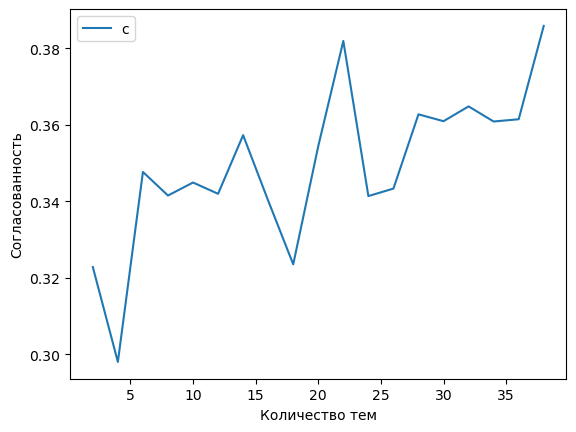

In [147]:
import matplotlib.pyplot as plt
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

### Жизнь после согласованности

In [148]:
from gensim.models.ldamulticore import LdaMulticore
model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=len(model_list)-1)
model.show_topics()

[(11,
  '0.005*"доход" + 0.005*"нк_рф" + 0.004*"статья_нк" + 0.003*"вычет" + 0.003*"п_ст" + 0.003*"расход" + 0.003*"ндфл" + 0.003*"минфин" + 0.002*"заявление" + 0.002*"пункт_статья"'),
 (4,
  '0.004*"миллиард_доллар" + 0.003*"трудовой" + 0.003*"трудовой_книжка" + 0.002*"доход" + 0.002*"миллиард_рубль" + 0.002*"выплата" + 0.002*"такой_образ" + 0.002*"конец_год" + 0.002*"суд" + 0.002*"сша"'),
 (16,
  '0.004*"миллион_доллар" + 0.003*"миллиард_доллар" + 0.002*"клуб" + 0.002*"миллион_евро" + 0.002*"чемпионат_россия" + 0.002*"настоящий_время" + 0.002*"трудовой" + 0.002*"контракт" + 0.002*"евро" + 0.002*"сделка"'),
 (15,
  '0.004*"взнос" + 0.002*"п_ст" + 0.002*"миллиард_рубль" + 0.002*"страховой_взнос" + 0.002*"январь_год" + 0.002*"нк_рф" + 0.002*"заявление" + 0.002*"товар" + 0.002*"клуб" + 0.002*"доход"'),
 (10,
  '0.004*"трудовой_договор" + 0.003*"трудовой" + 0.003*"бой" + 0.003*"доход" + 0.003*"й_минута" + 0.002*"миллион_доллар" + 0.002*"стать_известно" + 0.002*"миллиард_доллар" + 0.002*"с

In [149]:
import pyLDAvis.gensim_models
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
data

/home/timur/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/timur/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/timur/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/timur/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/timur/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Ve

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.046633  0.037799       1        1  13.065529
14    -0.022105 -0.034510       2        1   7.756035
3      0.017524  0.021759       3        1   7.695340
16     0.028039 -0.023896       4        1   6.517612
10     0.026242  0.010312       5        1   6.173053
17    -0.026557 -0.021686       6        1   5.586862
1      0.009283  0.010831       7        1   5.503355
5     -0.016867  0.003557       8        1   5.495863
2      0.016309 -0.008919       9        1   5.219427
13    -0.002870  0.028669      10        1   4.804615
4      0.036925  0.010426      11        1   4.697920
7      0.021748 -0.010984      12        1   4.661369
0      0.011785 -0.006891      13        1   4.128737
8     -0.006814  0.009189      14        1   3.897050
9      0.000932 -0.008936      15        1   3.843106
15    -0.005966  0.022145      16        1   3.832634
6     -0.025691 -0.016661      17        1   3.652816
12    -0.015284 -0.022202      18        1   3.468675, topic_info=                 Term         Freq        Total Category  logprob  loglift
3667  миллиард_доллар  2097.000000  2097.000000  Default  30.0000  30.0000
2479   миллиард_рубль  1431.000000  1431.000000  Default  29.0000  29.0000
6798  трудовой_книжка   614.000000   614.000000  Default  28.0000  28.0000
632    миллион_доллар  1367.000000  1367.000000  Default  27.0000  27.0000
4975    рабочий_место   496.000000   496.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
4              версия    33.880120   696.925387  Topic18  -6.7100   0.3375
1042           объект    32.292576   641.343937  Topic18  -6.7580   0.3727
7828     пункт_статья    32.411828   799.258155  Topic18  -6.7543   0.1562
441         конец_год    33.188987  1142.035301  Topic18  -6.7307  -0.1770
3294      электронный    32.458254  1176.363071  Topic18  -6.7529  -0.2288

[1396 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7245      2  0.019469         aar
7245      3  0.136282         aar
7245      4  0.077875         aar
7245      5  0.077875         aar
7245      6  0.038938         aar
...     ...       ...         ...
4388     11  0.028625  япония_сша
4388     13  0.028625  япония_сша
4388     14  0.057251  япония_сша
4388     15  0.085876  япония_сша
4388     18  0.057251  япония_сша

[13960 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 15, 4, 17, 11, 18, 2, 6, 3, 14, 5, 8, 1, 9, 10, 16, 7, 13])

In [150]:
# Сохраняем модель
model_list[len(model_list)-1].save('model/best_model.lda')
# Сохраняем словарь
from gensim import corpora
corpora.Dictionary.save(dictionary, "model/dictionary.dict")
# Сохраняем корпус
corpora.BleiCorpus.save_corpus(fname="model/corpus.lda-c",corpus= corpus)
# Сохраняем выражения 
bigram.save('./model/bigram.phs')
trigram.save('./model/trigram.phs')

In [153]:
import re

In [163]:
train_df['text_union'] = train_df['class'] +' '+ train_df['clean_info']

In [164]:
train_df['text_union'].to_csv('model/text_union.txt', index=False)

### fast_text

In [155]:
import fasttext
model = fasttext.train_supervised(input='model/text_union.txt', epoch=25, wordNgrams=2)
model.predict("Which baking dish is best to bake a banana bread ?")

Read 0M words
Number of words:  20881
Number of labels: 3
Progress: 100.0% words/sec/thread:  593235 lr:  0.000000 avg.loss:  0.390051 ETA:   0h 0m 0s


(('__label__other',), array([0.38445204]))

In [177]:
s = 'бизнес для бизнес'

In [178]:
model.predict(s)

(('__label__buh',), array([0.9977814]))

In [159]:
model.save_model('model/fasttext_model.bin')

In [183]:
train_df[train_df['class'] == '__label__buisness']['full_info'][421323]

'"Федеральная пассажирская компания", входящая в состав РЖД, с 4 июня предложит пассажирам услугу по перевозке личных легковых автомобилей в специальных вагонах-автомобилевозах. Об этом сообщается на сайте РЖД. По данным пресс-службы компании, опытная перевозка первого вагона для автомобилей состоится 4 июня в составе международного поезда "Лев Толстой", следующего по маршруту Москва - Хельсинки через Санкт-Петербург. По информации Autonews.ru, стоимость перевозки одного автомобиля составит 450 евро (17,8 тысячи рублей). В один спецвагон помещается, в зависимости от габаритов, три или четыре легковых автомобиля. В состав поезда "Лев Толстой" автомобилевоз будет включаться по предварительным заявкам. Таможенный досмотр машин при пересечении границы с Финляндией будет проводиться на станции Выборг. Как отмечается в пресс-релизе РЖД, при наличии спроса на услугу количество автомобилевозов в парке "Федеральной пассажирской компании" может быть увеличено. Кроме того, в дальнейшем автомобиле

In [51]:
late_model = fasttext.load_model('model/fasttext_model.bin')